In [1]:
import os
import sys
print('making sure I know where I am..', os.getcwd())
sys.path.insert(0, r'./../gpVIIP/')
sys.path.insert(0, r'./../gpVIIP/tests/')

import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex', 'grid'])
plt.rcParams.update({'font.size': 14,
                     'lines.markersize': 12})

gpcolor = r'#7b3294'
gpshade = r'#c2a5cf'
vicolor = r'#008837'
vishade = r'#a6dba0'


import torch
import numpy as np

from func3d import forrester2008

making sure I know where I am.. C:\Users\moses\Desktop\git\VIGP\code\notebooks


In [2]:
## Say we are given some data (2-dimensional)

# Set my noise level
noise = 0.25

[82.18439191 35.0297132  25.3327162 ]


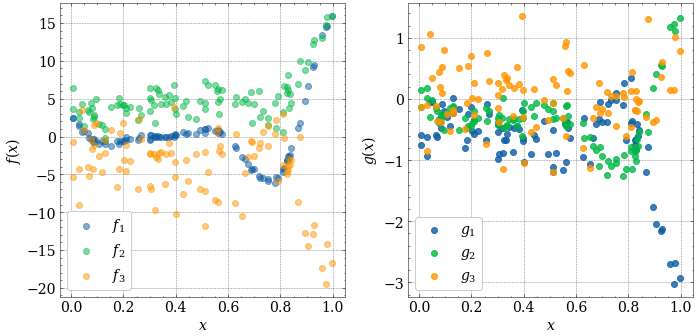

In [3]:
n = 100
x = np.random.uniform(0, 1, n)
# x = np.linspace(0, 1, n)

np.random.seed(150)
torch.manual_seed(1)

f = forrester2008(x, noisy=True, noiseconst=noise)

x = torch.tensor(x).unsqueeze(1)
f = torch.tensor(f)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for j in range(f.shape[0]):
#     ax[j].plot(x0, f0[j], lw=2, alpha=0.2, color='gray')
    ax[0].scatter(x, f[j], marker='.', label=noise, alpha=0.5)
    ax[0].set_ylabel('$f(x)$')
    ax[0].set_xlabel('$x$')
ax[0].legend(labels=['$f_1$', '$f_2$', '$f_3$'])

U, S, V = np.linalg.svd(f)

print(S)

g = (f.T @ (U / np.sqrt(S))).T
for j in range(g.shape[0]):
    ax[1].scatter(x, g[j], marker='.', alpha=0.8)
ax[1].legend(labels=['$g_1$', '$g_2$', '$g_3$'])
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$g(x)$')


plt.tight_layout()

In [4]:
from lcgp import LCGP



In [5]:
model = LCGP(y=f.T, x=x)



RuntimeError: The size of tensor a (100) must match the size of tensor b (3) at non-singleton dimension 1